In [ ]:
Objective:
To predict the House rent amount based on various attributes using
Multiple ML algorithms and compare the evaluation metrics of ml models.

In [ ]:
Attribute information

In [ ]:
BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Price of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats

In [1]:
import pandas as pd
df=pd.read_csv(r"E:\DS projects(only ipynb files & datasets)\House_Rent_Prediction_using_ML\House_Rent_Dataset.csv")
# df1=df.copy()
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [130]:
df.shape

(4746, 12)

In [131]:
df.info()

#I perform groupby on month column and display the average rent paid by each tenant in every month.
#I can do digital marketing.I can provide offers like 10% reduction in rent to tenants.
#A particular month will have high average rent.say december avg rent paid by each tentant is 20k
#We can provide 10% reduction in rent for each tentant.10% discount.Then many people will come to my 
#apartment and live in my apaertment houses.My business will increase.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [2]:
df.describe()


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
########################################
#bhk increases means rent increases    #
#size inc means rent inc               #
#Area type inc means rent inc          #
#based on city price varies            #
#based on furnishing price varies      #
#based on bathroom price varies        #
#tnenant inc price increases           #
########################################

In [ ]:
#No null values in the dataset.No need to perform null value treatment.

In [133]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [18]:
#convert date colum datatype from object to datetime
#create a new col named as month.retrieve month from date column.
#Month col is used to analyse.


In [20]:
# df['Posted On']=pd.to_datetime(df['Posted On'],utc=True)

In [134]:
df[df.columns[0]].dtype

dtype('O')

In [32]:
# df['Posted On'].str.slice(0,4)
#AttributeError: Can only use .str accessor with string values!
#It measn that u can use slice fun to slice substring from a string d type column.object
#We cannot slice substring from a datetime column.

In [34]:
# df['Year_of_ad_post']=df['Posted On'].str.slice(0,4)


In [ ]:
Date column gives u details about the date of job ad post.
Date column does not mean date of payment of the rent.
SO date is irrelevant column.I cannot predict rent amount based on date of ad posted by houseowner.

In [ ]:
#df.col1.str.slice() 
##df.col1.str.replace() 

In [3]:
df.drop(columns=['Posted On'], inplace=True)
#do not drop it

In [136]:
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [137]:
df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
#removed ir relevent features
#no need to change d types ..astype fun all cols have correct dtypes
#no null valuess
#create a copy of the raw clean dataset to perform data visualization.

In [4]:
df1=df.copy()

In [13]:
#df1 will be used for data visualization

In [ ]:
#Select num vars 

In [5]:
df_num=df.select_dtypes(include=['float64', 'int64'])
# df1_num
# df1_num1=df1_num.iloc[:,1:-1]
# df1_num1.head(5)
df_num.head(4)

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1


In [6]:
df_cat=df.select_dtypes(include=['object'])
df_cat

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [7]:
#display the value counts in each cate vars.Why?
#to replace different values using logic
for i in df_cat.columns:
    print(df_cat[i].value_counts())

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
18 out of 27         1
20 out of 41         1
4 out of 27          1
13 out of 40         1
17 out of 19         1
Name: Floor, Length: 480, dtype: int64
Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64
Bandra West                  37
Gachibowli                   29
Electronic City              24
Velachery                    22
Miyapur, NH 9                22
                             ..
Maidan Garhi, Chhattarpur     1
Aspire, Kandivali East        1
Hormavu Ring Road             1
Harrington Road               1
Nest bliss sholinganallur     1
Name: Area Locality, Length: 2235, dtype: int64
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Statu

In [ ]:
#There are no different values like '-1' and '?'.All fine.

In [ ]:
#to display -1 or different values in each num var we have to type the following code for each num var
# df_num.iloc[df_num.numvar==-1]
#-1 or any other value like '?'

In [100]:
df_cat.dtypes
#Floor means the floor number at which the house is available for rent
#The houses are available for rent in various areas in various cities across india.
#Many house owners prefer bachelor or family.Any thing is ok for them.There are 472 house owners who specificly 
#want family tenants

Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Point of Contact     object
dtype: object

In [27]:
#Floor has many cate values .So i wwill label encode them.
#Label encode the foloowing columns:1)Floor2)area locality
#one hot encode the folowing columns:1)City2)furnishing status3)Tenant4)Point of contact5)Area type


In [31]:
#Feature Engineering on cate vars

In [ ]:
#some columns has 4 cate values while some columns have 10+cate values.
#perform one hot encoding of these columns
#and perform label encoding on columns with 10+cate values.

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df_cat.Floor= le.fit_transform(df_cat.Floor)
#We can label encode a column in the same column only.
#We cannot put integer values in new column.

C:\Users\USER\anaconda\lib\site-packages\pandas\core\generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [172]:
df_cat

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,455,Super Area,221,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,14,Super Area,1527,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,14,Super Area,1760,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,10,Super Area,526,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,10,Carpet Area,1890,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,271,Carpet Area,219,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,16,Super Area,1214,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,271,Carpet Area,724,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,226,Carpet Area,590,Hyderabad,Semi-Furnished,Family,Contact Agent


In [37]:
# df1_cat['Area Type']= le.fit_transform(df1_cat['Area Type'])

In [10]:
df_cat['Area Locality']= le.fit_transform(df_cat['Area Locality'])

<ipython-input-10-72aa301b5e09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Area Locality']= le.fit_transform(df_cat['Area Locality'])


In [11]:
df_cat

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,455,Super Area,221,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,14,Super Area,1527,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,14,Super Area,1760,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,10,Super Area,526,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,10,Carpet Area,1890,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,271,Carpet Area,219,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,16,Super Area,1214,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,271,Carpet Area,724,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,226,Carpet Area,590,Hyderabad,Semi-Furnished,Family,Contact Agent


In [179]:
df_cat.columns

Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [12]:
a=df_cat.iloc[:,[1,3,4,5,6]]
a

,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
0,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,Carpet Area,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...
4741,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,Carpet Area,Hyderabad,Semi-Furnished,Family,Contact Agent


In [13]:
dummy=pd.get_dummies(data=a)
dummy

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4742,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4743,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
4744,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0


In [14]:
dummy1=pd.concat([dummy,df_cat],axis=1)
dummy1

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,...,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,455,Super Area,221,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,14,Super Area,1527,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,0,0,1,0,0,0,0,1,0,0,...,0,0,1,14,Super Area,1760,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,10,Super Area,526,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,10,Carpet Area,1890,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0,1,0,0,0,0,1,0,0,0,...,0,0,1,271,Carpet Area,219,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,0,0,1,0,0,0,1,0,0,0,...,0,0,1,16,Super Area,1214,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,0,1,0,0,0,0,1,0,0,0,...,1,0,0,271,Carpet Area,724,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,0,1,0,0,0,0,1,0,0,0,...,1,0,0,226,Carpet Area,590,Hyderabad,Semi-Furnished,Family,Contact Agent


In [15]:
dummy1.drop(columns=['Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact'],inplace=True)

In [16]:
dummy1.head(10)

,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor,Area Locality
0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,455,221
1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,14,1527
2,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,14,1760
3,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,10,526
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,10,1890
5,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,447,1975
6,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,458,1184
7,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,10,1184
8,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,10,1476
9,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,14,1358


In [17]:
#Feature Engineering Numerical columns
from sklearn.preprocessing import MinMaxScaler

In [18]:
#Applying min max scaling on num vars
mn=MinMaxScaler()
c=mn.fit_transform(df_num)
df_num_mn=pd.DataFrame(c,columns=df_num.columns)
df_num_mn.head(5)
#TV named Rent must be scaled when u scaled inp num vars.

,BHK,Rent,Size,Bathroom
0,0.2,0.002515,0.136421,0.111111
1,0.2,0.005373,0.098874,0.000000
2,0.2,0.004516,0.123905,0.000000
3,0.2,0.002515,0.098874,0.000000
4,0.2,0.001801,0.105131,0.000000


In [19]:
df_pre=pd.concat([df_num_mn,dummy1],axis=1)
df_pre.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor,Area Locality
0,0.2,0.002515,0.136421,0.111111,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,455,221
1,0.2,0.005373,0.098874,0.000000,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,14,1527
2,0.2,0.004516,0.123905,0.000000,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,14,1760
3,0.2,0.002515,0.098874,0.000000,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,10,526
4,0.2,0.001801,0.105131,0.000000,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,10,1890


In [91]:
#df_pre has scaled num vars + dummy vars

In [20]:
#Train test split
x=df_pre.loc[:,df_pre.columns!='Rent']

In [21]:
y=df_pre.loc[:,['Rent']]

In [99]:
# y.unique()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.3)

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3322, 23), (3322, 1), (1424, 23), (1424, 1))

In [24]:
x_train.sort_index(ascending=True,inplace=True)

In [25]:
x_train.head(4)

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor,Area Locality
1,0.2,0.098874,0.000000,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,14,1527
4,0.2,0.105131,0.000000,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,10,1890
8,0.2,0.098874,0.111111,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,10,1476
9,0.2,0.123905,0.111111,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,14,1358


In [26]:
x_test.sort_index(ascending=True, inplace=True)

In [108]:
x_test.head(3)

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor,Area Locality
0,0.2,0.136421,0.111111,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,455,221
2,0.2,0.123905,0.000000,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,14,1760
3,0.2,0.098874,0.000000,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,10,526


In [27]:
y_train.sort_index(ascending=True, inplace=True)

In [111]:
y_train
#when y is a df with one col,ytrai must be a df with one col
#ytest must be a df with on col which is tv

,Rent
1,0.005373
4,0.001801
8,0.007088
9,0.002515
10,0.006802
...,...
4737,0.003944
4738,0.004516
4740,0.003087
4743,0.009660


In [28]:
y_test.sort_index(ascending=True, inplace=True)

In [113]:
y_test

,Rent
0,0.002515
2,0.004516
3,0.002515
5,0.001658
6,0.002515
...,...
4735,0.009660
4739,0.006802
4741,0.003944
4742,0.007946


In [65]:
import statsmodels.api as sm
MLR_model1=sm.OLS(y_train,x_train).fit()
print(MLR_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     68.59
Date:                Mon, 05 Feb 2024   Prob (F-statistic):          7.12e-212
Time:                        11:31:32   Log-Likelihood:                 8143.5
No. Observations:                3322   AIC:                        -1.625e+04
Df Residuals:                    3303   BIC:                        -1.613e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
BHK   

In [30]:
#calculate mse and r-square

y_test_pred = MLR_model1.predict(x_test)
y_test_pred.count()

1424

In [236]:
y_test_pred

0       0.007285
2       0.003324
3       0.001233
5       0.000289
6       0.004584
          ...   
4735    0.007064
4739    0.003691
4741    0.003489
4742    0.017675
4744    0.010805
Length: 1424, dtype: float64

In [31]:
y_test_pred[33]

0.0008865793725952333

In [32]:
y_test.Rent[33]

0.0010860866582828397

In [ ]:
#actual op value of a dp at row index 33 is 0.001
#predicted op value of a dp at row index 33 is 0.0008
#error is less.Ml model has made almost accurate prediction for this dp.

In [33]:
#MSE manually


s1=(y_test_pred-y_test['Rent'])**2
type(s1)
s1

0       2.275539e-05
2       1.421470e-06
3       1.642785e-06
5       1.872482e-06
6       4.281801e-06
            ...     
4735    6.740399e-06
4739    9.682190e-06
4741    2.070112e-07
4742    9.467022e-05
4744    2.935474e-06
Length: 1424, dtype: float64

In [35]:
import numpy as np

In [36]:
np.sum(s1)/len(y_test)

0.00012119726703355037

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_true=y_test.Rent,y_pred=y_test_pred)

0.00012119726703355037

In [250]:
#MSE is close to 0.
#THe OLS model which is Linear Regression model is a good model.

In [253]:
y_test.Rent

0       0.002515
2       0.004516
3       0.002515
5       0.001658
6       0.002515
          ...   
4735    0.009660
4739    0.006802
4741    0.003944
4742    0.007946
4744    0.012519
Name: Rent, Length: 1424, dtype: float64

In [39]:
# for r square
from sklearn.metrics import r2_score
r2_score(y_true=y_test.Rent, y_pred=y_test_pred)
#in the y_true u can pass a df with one column or a series data.
#YOu can pass either of the two data.

0.5461112718690754

In [ ]:
#to calc mae

In [40]:
from sklearn.metrics import mean_absolute_error,r2_score

In [41]:
mean_absolute_error(y_true=y_test,y_pred=y_test_pred)

0.0064627912538233615

In [42]:
s2=np.abs(y_test.Rent-y_test_pred)
s2

0       0.004770
2       0.001192
3       0.001282
5       0.001368
6       0.002069
          ...   
4735    0.002596
4739    0.003112
4741    0.000455
4742    0.009730
4744    0.001713
Length: 1424, dtype: float64

In [265]:
# np.sum(s2)/len(y_test)

In [ ]:
#MAE is named as mean absolute error.error is difference between actuual op value and predicted op value 
#for all the datapoints.
#Mae is mean of absolute difference between act op value and predicted op value.

In [ ]:
#MAe is close to 0.good model.

In [43]:
r2_score(y_true=y_test.Rent,y_pred=y_test_pred)



0.5461112718690754

In [267]:
#Data visualization
import seaborn as sns

In [44]:
df1.tail()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [87]:
#BI VARIATE ANALYSIS

In [293]:

import matplotlib.pyplot as plt

In [45]:
df1.groupby(by=['City'])['Rent'].max()

City
Bangalore    3500000
Chennai       600000
Delhi         530000
Hyderabad     400000
Kolkata       180000
Mumbai       1200000
Name: Rent, dtype: int64

In [46]:
df_cr=pd.DataFrame(df1.groupby(by=['City'])['Rent'].mean())
df_cr

,Rent
City,
Bangalore,24966.365688
Chennai,21614.092031
Delhi,29461.983471
Hyderabad,20555.048387
Kolkata,11645.173664
Mumbai,85321.204733


In [47]:
df_cr['City']=df_cr.index

In [298]:
df_cr

,Rent,City
City,,
Bangalore,24966.365688,Bangalore
Chennai,21614.092031,Chennai
Delhi,29461.983471,Delhi
Hyderabad,20555.048387,Hyderabad
Kolkata,11645.173664,Kolkata
Mumbai,85321.204733,Mumbai


In [48]:
plt.bar(x='City',height='Rent',data=df_cr)
# plt.figsize()

NameError: name 'plt' is not defined

In [ ]:
The average rent at a house in Mumbai is 85k.It is higher than avg rent in other cities.
So Cost of living is high in mumbai compared  to other cities.

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

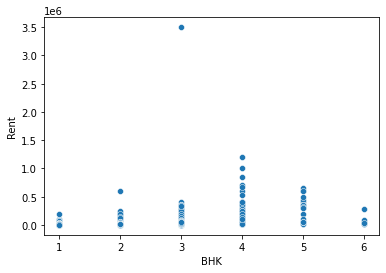

In [300]:
#scatter plot 1
sns.scatterplot(data=df1,x=df1.BHK,y=df1.Rent)


In [302]:
df1.loc[df1.BHK==3]['Rent'].max()
#Select the records where bhk equal to 3.rent col is selected.
#max rent for 3 bhk house is 35 lakh.

3500000

In [ ]:
#For a 3 BHK house,the maximum rent is 35,00,000.It is displayed in graph too.
#4 BHK houses have high rents compared to other bhk houses.

In [ ]:
#scatter plot 2

<AxesSubplot:xlabel='Size', ylabel='Rent'>

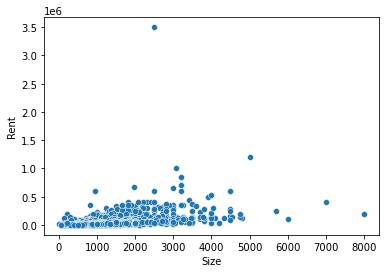

In [303]:

sns.scatterplot(data=df1,x=df1.Size,y=df1.Rent)


When the size of the house is high ,rent is high.
big house have high rent.small house have less rent.



In [304]:
df1.loc[(df1.Size>=3000) & (df1.Size<=4000)]['Rent'].mean()

206064.51612903227

In [ ]:
#Mean rent amount of houses whose sizes range btw 3000 to 4000 units is 2.06 lakh rupees.(units)
#70k inc

In [308]:
df1.loc[(df1.Size>=2000) & (df1.Size<=3000)]['Rent'].mean()

128650.4409090909

In [ ]:
#Mean rent amount of houses whose sizes range btw 2000 to 3000 units is 1.28 lakh rupees.(units)

In [ ]:
#df.groupby
#df.loc[where cond 1,2]['num var'].agg function.

In [307]:
df1.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [ ]:
#As the size of the house increases,rent increases.
#A tenant needs to pay high rent for a big house.

In [310]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

In [311]:
dt=DecisionTreeRegressor(criterion='squared_error',min_samples_split=2,min_samples_leaf=1,random_state=45)

In [312]:
dtree=dt.fit(x_train,y_train)

In [318]:
y_pred2=dtree.predict(x_test)
y_pred2

array([0.00251515, 0.00394421, 0.0013719 , ..., 0.00280096, 0.01180405,
       0.01966388])

In [ ]:
###mse,mae,r squared error value
#mse,mae,r squared error value
#calculate the mse,mae,r squared value of test data.

In [320]:
y_test

,Rent
0,0.002515
2,0.004516
3,0.002515
5,0.001658
6,0.002515
...,...
4735,0.009660
4739,0.006802
4741,0.003944
4742,0.007946


In [321]:
#mse on test data when we build decision tree regressor model
mean_squared_error(y_true=y_test.Rent,y_pred=y_pred2)


0.0007889701479790438

In [322]:
mean_absolute_error(y_true=y_test.Rent,y_pred=y_pred2)

0.00474369322290917

In [323]:
r2_score(y_true=y_test.Rent,y_pred=y_pred2)

-1.9547255129139463

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [325]:
rf=RandomForestRegressor(n_estimators=250,criterion='squared_error',min_samples_split=2,min_samples_leaf=1,random_state=45)


In [326]:
rforest=rf.fit(x_train,y_train)

<ipython-input-326-adebac8fb39e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest=rf.fit(x_train,y_train)


In [327]:
y_pred3=rforest.predict(x_test)
#predict function reads the xtest data and predicts the op values of the test data.
#Predict function uses trained random forest model object named as rforest object.

In [328]:
y_pred3

array([0.00322716, 0.00389676, 0.0017574 , ..., 0.00344793, 0.0071676 ,
       0.01297016])

In [329]:
#mse on test data when we build Random forest regressor model
mean_squared_error(y_true=y_test.Rent,y_pred=y_pred3)

0.00016519473519581286

In [330]:
mean_absolute_error(y_true=y_test.Rent,y_pred=y_pred3)

0.003740089377678097

In [333]:
r2_score(y_true=y_test.Rent,y_pred=y_pred3)

0.38133895188250333

In [86]:
x_test

,BHK,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,...,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor,Area Locality
0,0.2,0.136421,0.111111,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,455,221
2,0.2,0.123905,0.000000,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,14,1760
3,0.2,0.098874,0.000000,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,10,526
5,0.2,0.073842,0.111111,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,447,1975
6,0.2,0.086358,0.111111,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,458,1184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,0.4,0.155194,0.111111,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,313,1619
4739,0.2,0.128911,0.111111,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,1,198,590
4741,0.2,0.123905,0.111111,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,271,219
4742,0.4,0.249061,0.222222,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,16,1214


In [57]:
x_test.iloc[:,8:]

,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor,Area Locality
0,0,0,1,0,0,0,1,0,1,0,0,0,1,455,221
2,0,0,1,0,0,1,0,0,1,0,0,0,1,14,1760
3,0,0,1,0,0,0,1,0,1,0,0,0,1,10,526
5,0,0,1,0,0,0,1,0,1,0,0,0,1,447,1975
6,0,0,1,0,0,0,1,1,0,0,1,0,0,458,1184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,0,1,0,0,1,0,0,1,0,0,0,0,1,313,1619
4739,0,1,0,0,0,0,1,1,0,0,0,0,1,198,590
4741,0,1,0,0,0,1,0,0,1,0,0,0,1,271,219
4742,0,1,0,0,0,1,0,0,1,0,0,0,1,16,1214


In [68]:
y_test

,Rent
0,0.002515
2,0.004516
3,0.002515
5,0.001658
6,0.002515
...,...
4735,0.009660
4739,0.006802
4741,0.003944
4742,0.007946


In [85]:
input_data = (0.2,0.136421,0.11,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,455,221)
# Change the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# Reshape the array for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = MLR_model1.predict(input_data_reshaped)
print(prediction)

[0.00726317]


In [ ]:
# #if (prediction[0] == 0):
#   print('The person will not get H.A')
# else:
#   print('The person will get H.A')

In [ ]:
Conclusion:
    
Models:                     MSE        MAE       R_squared
1)Linear Regression         0.00012    0.0064    0.546
2)DecisionTreeRegressor     0.00078    0.0047
3)RandomForestRegressor     0.00016    0.0037    0.38

In [ ]:
Linear Regression model(OLS) is the best model because it has MSE close to 0,
MAE close to 0,RMSE close to 0 and High R_Sqaured value.
IT has made accurate predictions.
